# Serie A - Pressing


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from highlight_text import fig_text
import pandas as pd

from PIL import Image
import urllib
import os

In [3]:
font_path = "assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")


## Leggere il dataframe

In [4]:
import ScraperFC as sfc
import traceback

# Initialize the Understat scraper
scraper = sfc.Understat()
try:
    # Scrape the table
    table = scraper.scrape_league_table(year=2023, league="Serie A")
    #formations = scraper.scrape_formations(year=2023, league="Serie A")

except:
    # Catch and print any exceptions. This allows us to still close the
    # scraper below, even if an exception occurs.
    traceback.print_exc()
finally:
    # It"s important to close the scraper when you"re done with it. Otherwise,
    # you"ll have a bunch of webdrivers open and running in the background.
    scraper.close()

table

[WDM] - Downloading: 100%|██████████| 6.80M/6.80M [00:00<00:00, 14.7MB/s]


,№,Team,M,W,D,L,G,GA,PTS,xG,NPxG,xGA,NPxGA,NPxGD,PPDA,OPPDA,DC,ODC,xPTS
0,1,Napoli,34,26,5,3,70,23,83,64.83,57.98,27.27,25.75,32.24,9.46,16.64,306,157,71.36
1,2,Juventus,34,20,6,8,52,28,66,53.68,48.99,35.76,32.72,16.27,13.37,11.89,185,185,58.1
2,3,Lazio,34,19,7,8,52,26,64,46.85,41.38,40.35,39.59,1.79,14.95,13.57,240,183,49.98
3,4,Inter,34,20,3,11,62,35,63,66.38,62.57,29.85,27.57,35.00,9.79,17.93,310,160,71.38
4,5,AC Milan,34,17,10,7,55,39,61,61.28,59.00,36.69,32.88,26.12,9.28,13.07,245,186,62.25
5,6,Atalanta,34,17,7,10,56,41,58,53.74,47.48,39.16,36.88,10.60,11.14,12.40,291,172,55.69
6,7,Roma,34,17,7,10,45,33,58,57.83,50.90,27.42,25.14,25.76,12.47,10.66,208,127,65.05
7,8,Fiorentina,34,12,10,12,45,40,46,48.8,44.23,45.58,40.25,3.98,8.47,11.49,261,157,47.81
8,9,Udinese,34,11,13,10,45,41,46,43.55,42.03,44.41,39.76,2.26,12.78,10.01,242,202,46.82
9,10,Bologna,34,12,10,12,43,44,46,39.37,34.81,49.96,43.11,-8.30,9.96,13.72,153,211,40.61


In [5]:
df = pd.read_csv('data/pressing_ppda.csv', index_col=0)
df = df.sort_values(by='PPDA').reset_index(drop=True)

df

,team_id,Team,PPDA,OPPDA
0,8535,Fiorentina,8.36,11.38
1,8564,AC Milan,9.22,13.05
2,9875,Napoli,9.42,16.65
3,8636,Inter,9.72,18.10
4,9857,Bologna,9.93,13.41
5,9881,Spezia,10.97,9.88
6,6504,Monza,11.00,12.54
7,9888,Lecce,11.16,8.29
8,8524,Atalanta,11.45,12.43
9,9804,Torino,11.67,13.93


## Visualizzazione

In [219]:
def plot_inequality(ax, fig, df):
    '''
    This function helps us save a bit of code to plot
    the different inequality metrics of our visual
    '''

    data = df.copy()
    data = (
        data
        .sort_values(by = "PPDA", ascending = True)
        .reset_index(drop = True)
    )
    width = 0.7
    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['PPDA'].min(),vmax=data['PPDA'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data["PPDA"],
        color=cmap(norm(data["PPDA"])),
        #ec = "#000000", 
        #fc = "#74959A", 
        #alpha = 1,
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data["PPDA"]):
    
        format_str = f"{value:.2f}"
        text_ = ax.annotate(
            xy = (index, value-0.2),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 18, 2)])

    '''
    xticks_ = ax.xaxis.set_ticks(
        ticks = data.index,
        labels = []
    )
    '''

    #ax.tick_params(labelsize = 8)

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    #ax.tick_params(labelsize = 8)

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,16),
        xytext=(6, 16),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,16),
        xytext=(13, 16),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,16),
        xytext=(6, 16),
        text='pressing più intenso',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,16),
        xytext=(13, 16),
        text='pressing meno intenso',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

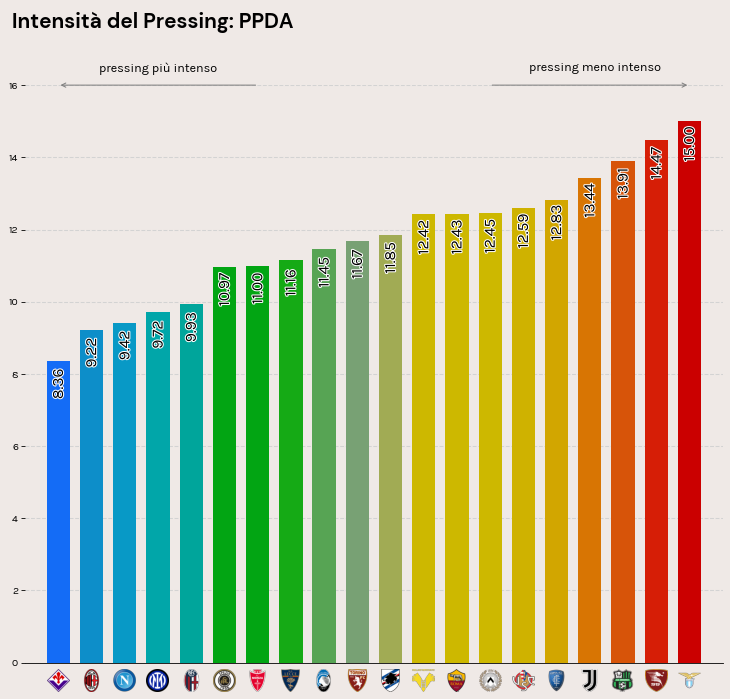

In [220]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Intensità del Pressing: PPDA",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

'''
fig_text(
	x = 0.11, y = .895, 
    s = "Inequality ratios on Serie A teams ball touches | Season 2021/2022 | Viz by @sonofacorner\nPlayers with +1,000 minutes. Ordered from most unequal to least equal spread of touches.\n\n<- Gini> is an index that measures inequality within a population, it takes values from 0\n (complete equality) to 1 (complete inequality).\n<- Palma> is a ratio that can be interpreted as the top 10% of players with the most touches have \nX times more touches than the bottom 40%.\n<- Hoover> measures the amount of touches that would need to be redistributed for all players to\nhave the same number of touches.",
    highlight_textprops=[{"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}, {"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)
'''


plt.savefig(
	"figures/SerieA_PPDA.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_PPDA_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)
